# Part 2.5: Supervised Learning - Random Forest Regressor

A Random Forest is an **ensemble** method that works by constructing a multitude of decision trees at training time and outputting the average prediction of the individual trees. It is a form of **bagging** (Bootstrap Aggregating) and is highly effective at reducing the overfitting seen in single decision trees.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Use the same data as the Decision Tree example
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Fit the models
tree_reg = DecisionTreeRegressor(max_depth=5)
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
tree_reg.fit(X, y)
forest_reg.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### How Random Forest Works
1.  **Bootstrap Sampling**: It creates many random subsamples of the training data with replacement.
2.  **Random Feature Subsets**: For each tree, it considers only a random subset of features for splitting at each node.
3.  **Averaging Predictions**: It trains a Decision Tree on each subsample and averages their predictions to produce the final result.

This combination of bootstrapping and feature randomness creates diverse trees, and their collective wisdom is usually better than any single tree's prediction.

### Visualizing the Predictions
The Random Forest's prediction is much smoother and less overfit than the single, deep decision tree.

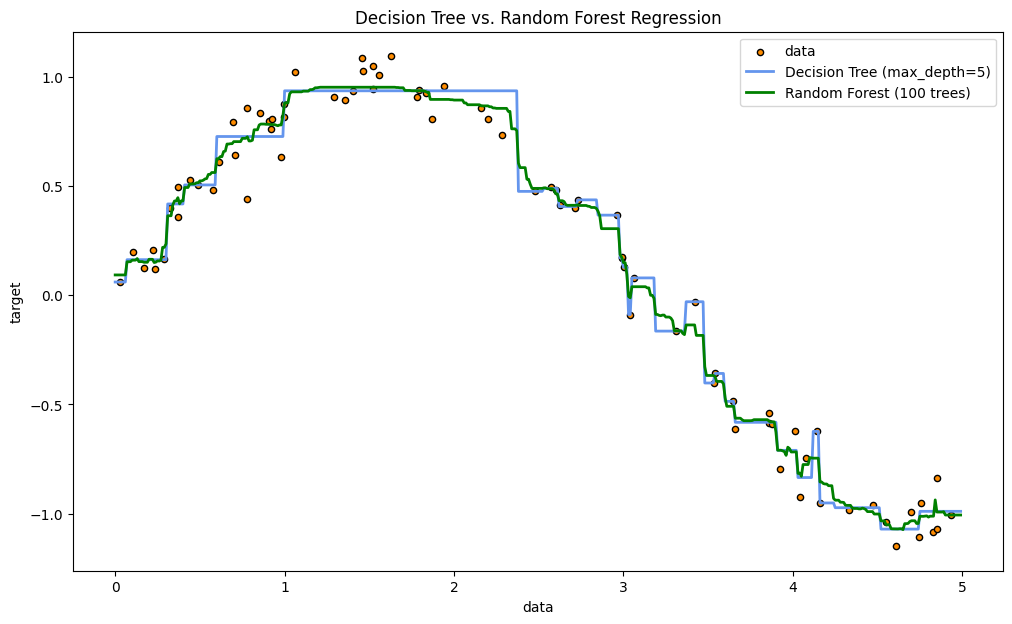

In [2]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree_pred = tree_reg.predict(X_test)
y_forest_pred = forest_reg.predict(X_test)

plt.figure(figsize=(12, 7))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_tree_pred, color="cornflowerblue", label="Decision Tree (max_depth=5)", linewidth=2)
plt.plot(X_test, y_forest_pred, color="green", label="Random Forest (100 trees)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree vs. Random Forest Regression")
plt.legend()
plt.show()

The Random Forest model provides a much more robust and generalized fit to the underlying sine wave pattern compared to the single Decision Tree, which shows more signs of overfitting to the training data's noise.